# Analyze single-cell mRNA-seq data for flu-infected mice
[Steuerman et al](https://www.ncbi.nlm.nih.gov/pubmed/29886109) infected mice with flu, and then looked to see what mRNAs are made in each single cell.

Do the cells that make more of an innate immune gene (Mx1) that targets flu have less flu mRNA in them?

## Import R packages
We are going to do this analysis just with `tidyverse`.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.6
✔ tidyr   0.7.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Make the plots format nicely:

In [2]:
options(repr.plot.width=3, repr.plot.height=2.4)
theme_set(theme_bw(base_family='Helvetica', base_size=15))

## Get the data for this study.
We are downloading data from GEO [for this sample](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM2884122).

In [4]:
weblink = 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM2884122&format=file&file=GSM2884122%5FFlu%5Ftreated%5FCD45n%5F48h%5Frep1%5Fumis%2Etxt%2Egz'
downloadfile = 'infected_mouse.txt.gz'

download.file(weblink, downloadfile)

Read the data into a data frame:

In [5]:
sc_data_raw <- read.table(downloadfile)

Look at the first few lines:

In [6]:
sc_data_raw %>% head

,W441617,W441618,W441619,W441620,W441621,W441622,W441623,W441624,W441625,W441626,⋯,W442759,W442760,W442761,W442762,W442763,W442764,W442765,W442766,W442767,W442768
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,2,0,0,0,2,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,1
0610007P22Rik,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,1,0,0,0,0,0


We want to switch the data frame around so that the genes are the columns and the cells are the rows:

In [10]:
sc_data <- data.table::transpose(sc_data_raw)
colnames(sc_data) <- rownames(sc_data_raw)

In [12]:
sc_data[1 : 200] %>% head

0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,⋯,1700006J14Rik,1700006P19Rik,1700007B14Rik,1700007G11Rik,1700007I08Rik,1700007J10Rik,1700007K09Rik,1700007K13Rik,1700007L15Rik,1700007M16Rik
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Now the columns are the gene names.

## Analyze data
There are good ways designed to analyze these data (for instance, you can look at the `Monocle` package by Cole Trapnell), but we are doing a simple analysis of just two genes.

In [13]:
sc_data$ntotal <- rowSums(sc_data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


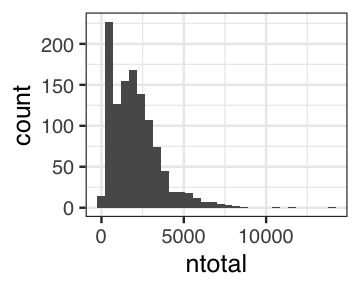

In [14]:
ggplot(sc_data, aes(ntotal)) +
  geom_histogram()

A simplistic way (not the best way, again see `Monocle`) is to compute the **fraction** of each cell's mRNA from Mx1 and from some flu gene:

In [16]:
sc_data <- sc_data %>%
  mutate(frac_Mx1=Mx1 / ntotal,
         frac_fluNP=FluSegment5_p / ntotal)

We're going to look at distribution of how much flu NP the cells have:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


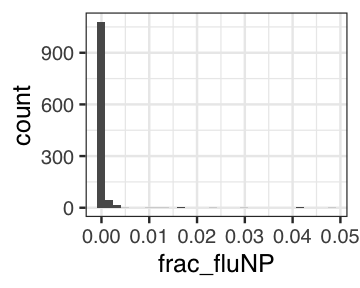

In [17]:
ggplot(sc_data, aes(frac_fluNP)) +
  geom_histogram()

We will say a cell is infected if it has at least some flu:

In [18]:
infected <- sc_data %>% filter(frac_fluNP > 0)

Then we can look at these cells:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


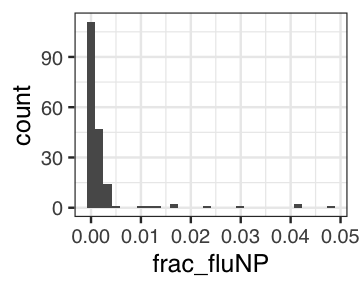

In [19]:
ggplot(infected, aes(frac_fluNP)) +
  geom_histogram()

Is there a correlation between how much flu and how much NP?

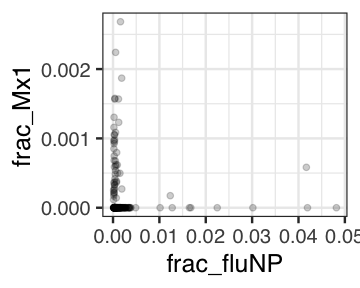

In [21]:
ggplot(infected, aes(frac_fluNP, frac_Mx1)) +
  geom_point(alpha=0.2)

In [22]:
cor.test(infected$frac_fluNP, infected$frac_Mx1)


	Pearson's product-moment correlation

data:  infected$frac_fluNP and infected$frac_Mx1
t = -0.83093, df = 181, p-value = 0.4071
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.20486983  0.08416411
sample estimates:
        cor 
-0.06164514 


From this limited analysis, it's hard to draw strong conclusions, although weakly consistent with more Mx1 meaning less flu.